<a href="https://colab.research.google.com/github/vaqanzel/Mesin-Learning/blob/main/T11_2341720016_Valentina_Santi_Grehasta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Valentina Santi Grehasta**

**Kelas: TI-3C**

**NIM: 2341720016**

#**PRAKTIKUM 1**

**Langkah 1 - Import Library**

In [66]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Langkah 2 - Membuat Data Dummy**

Pada praktikum ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

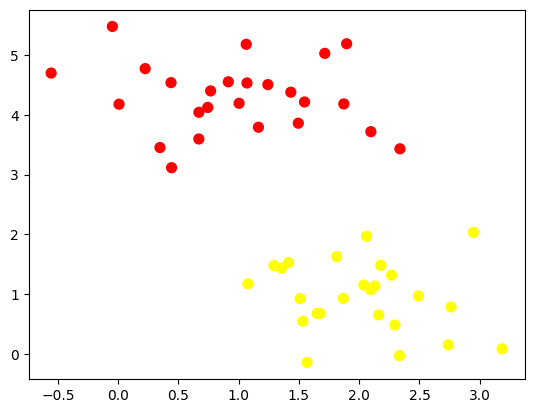

In [67]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Langkah 3 - Buat Ilustrasi Garis Pemisah**

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

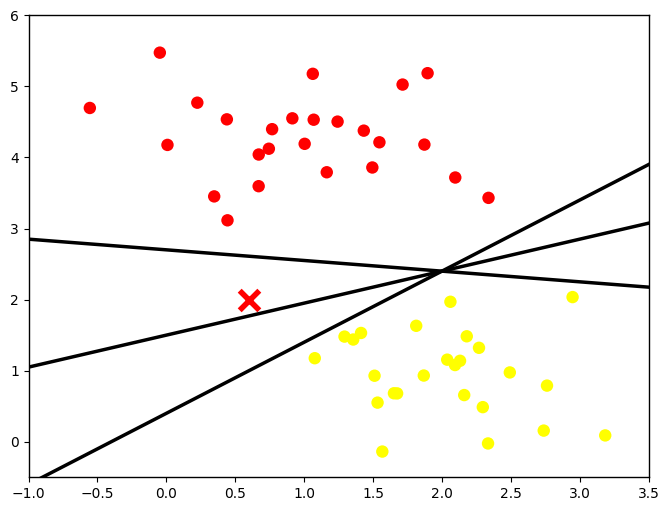

In [68]:
# buat data
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# parameter plot
fig, ax = plt.subplots(figsize=(8,6))

# scatter klaster
ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap='autumn', edgecolors='none')

# titik 'X' merah
x_test = 0.6
y_test = 2.0
ax.scatter(x_test, y_test, s=200, marker='x', c='red', linewidths=4)

# titik potong garis (dipusatkan di 2.0, 2.5)
xi, yi = 2.0, 2.4

# beberapa slope berbeda, semua lewat (xi, yi)
slopes = [1.0, 0.45, -0.15]
xfit = np.linspace(-1, 3.5, 200)
for m in slopes:
    b = yi - m * xi
    ax.plot(xfit, m * xfit + b, '-k', linewidth=2.5)

# batas sumbu dan tampilan
ax.set_xlim(-1, 3.5)
ax.set_ylim(-0.5, 6)
ax.tick_params(direction='out')

for spine in ax.spines.values():
    spine.set_linewidth(1.0)

plt.show()

**Langkah 4 - Ilustrasi Margin**

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

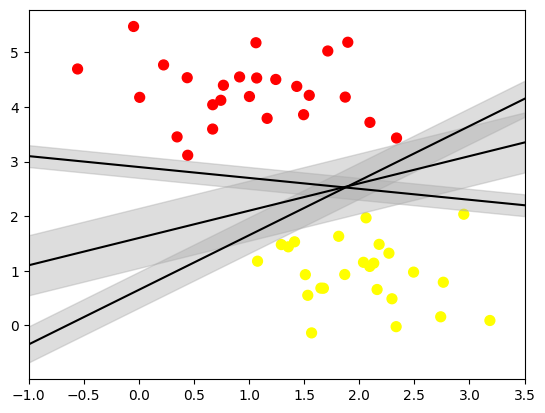

In [69]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Langkah 5 - Fitting Model**
Selanjutnya, kita akan melakukan pelatihan terhadap model SVM. Model kali ini akan menggunakan fungsi (kernel) dengan jenis linier.

In [70]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Selanjutnya buat fungsi untuk membantu visualisasi hasil fit model.

In [71]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Lakukan plotting dengan fungsi yang telah dibuat.

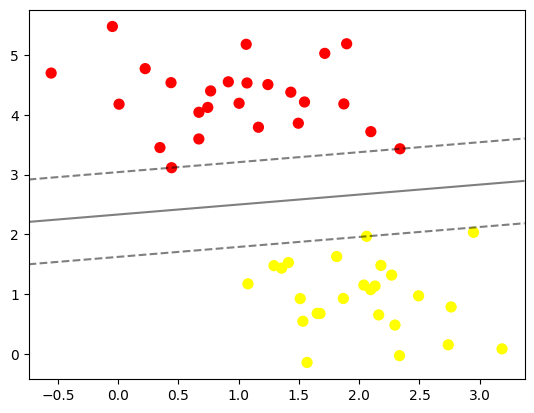

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector. Untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

In [73]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

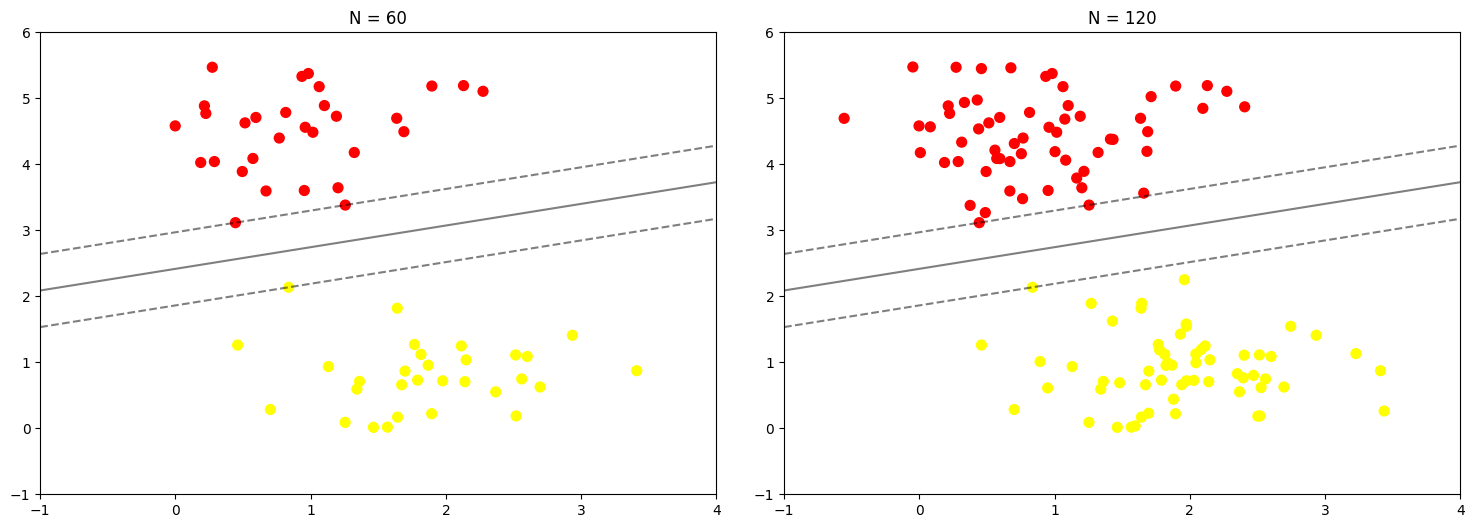

In [74]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. Ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini

In [75]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

NB: Kode mungkin tidak dapat dijalankan pada Google Colab. Lakukan instalasi modul ipywidgets  terlebih dahulu,

In [76]:
!pip install ipywidgets

Berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. Ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini

In [77]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

#**PRAKTIKUM 2**
Klasifikasi SVM dengan Data Dummy Non-Linier

**Pengantar**

Pada praktikum ke-2 ini, kita akan mencoba memanfaatkan SVM untuk mengklasifiaksikan data dengan distribusi non-linier. Dengan menggunakan kernel trick, SVM juga mampu membuat decision boundaries pada data non-linier.

**Langkah 1 - Ilustrasi Data Non-Linier**

Data yang terpisah secara tidak linier menjadi masalah pada model SVM. Oleh karena itu, kernel menjadi sebuah kebutuhan bagi SVM untuk melakukan fitting pada hubungan non-linier dengan sebuah classifier linier.

**Langkah 1a - Import Library**

In [78]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

**Langkah 1b - Buat Kembali Fungsi Plotting**

In [79]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Langkah 1c - Buat Data Dummy Non-Linier**

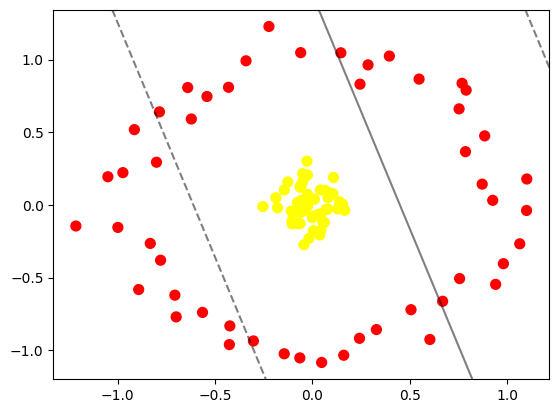

In [80]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

plot visualisasi diubah menjadi model 3D.

In [81]:
import numpy as np
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    # Hitung 'r' di dalam fungsi
    r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)

    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180), # Perbaiki 'azip' -> 'azim'
         X=fixed(X), y=fixed(y)); # Tidak perlu 'r' di sini

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

**Langkah 2 - Fitting Model**

Walaupun data dapat ditampilkan secara terpisah. Proyeksi titik data sejumlah N ke dalan suatu dimensi N menyebabkan beban komputasi juga bertambah. Untuk mengatasi hal ini, kernel radial basis function (RBF) pada Scikit-Learn digunakan.

In [82]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Plot hasil decision boundaries dari kernel RBF

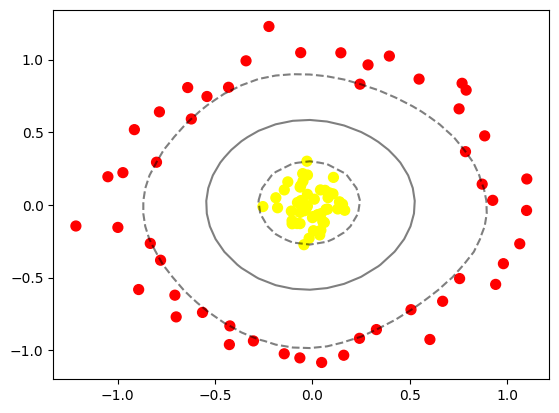

In [83]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

#**Praktikum 3**
SVM Data Overlapping

**Pengantar**

Pada dua praktikum sebelumnya, kita sudah dapat mengatasi untuk sebaran data linier dan non-linier. Akan tetapi, jika diperhatikan, decision boundaries dapat memisahkan data secara jelas dikarenakan tidak terdapat data yang tumpang tindih (overlapping). Lalu, apa yang dapat kita lakukan ketika berhadapan dengan data yang tumpang tindih? Dalam pembuatan model pembelajaran mesin, kita mengenal istilah hyperparameter tunning. Dengan cara ini, kita dapat menyesuaikan parameter-parameter dalam model sehingga dapat mengatasi permasalahan data tumpang tindih.

**Langkah 1 - Import Library dan Buat Fungsi Plotting**

In [84]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [85]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Langkah 2 - Buat Data Dummy**

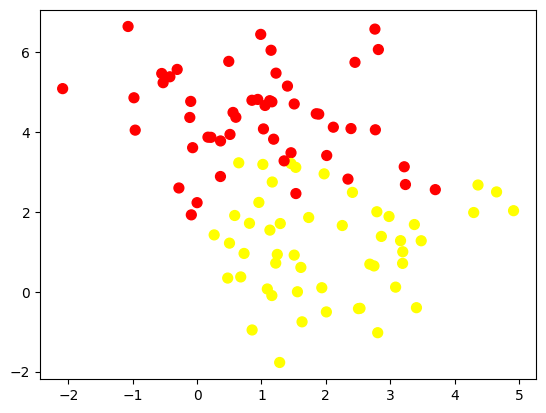

In [86]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Langkah 3 - Analisis Dampak Tunning**

Untuk mengatasi hal ini, teknik penghalusan margin pada SVM dapat diterapkan. Teknik ini berfungsi untuk memasukkan beberapa titik data ke dalam margin supaya menghasilkan fitting yang lebih baik. Penebalan margin dari hasil teknik penghalusan dikelola oleh sebuah parameter tuning (dikenal sebagai C). Contoh dibawah menunjukkan perubahan pada C berdampak pada hasil fitting final.

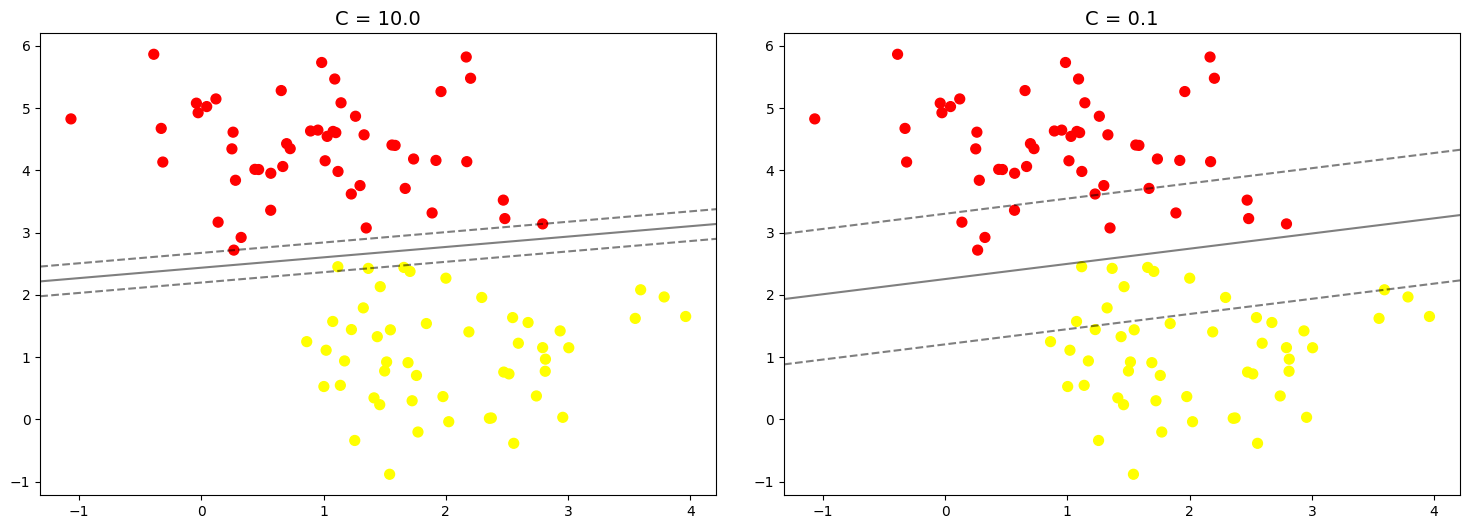

In [87]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Perlu diperhatikan bahwa nilai optimal sebuah C bergantung pada setiap dataset (melalui cross-validation atau prosedur serupa).

#**PRAKTIKUM 4**

Klasifikasi Citra Wajah

**Pengantar**

Setelah kita memahami proses klasifikasi dengan menggunakan SVM, selanjutnya kita akan belajar melakukan klasifikasi dengan data riil berupa citra wajah. Dataset yang akan digunakan adalah dataset wajah-wajah dari ribuan publik figur.

NB: Anda mungkin memerlukan waktu yang cukup lama untuk mengunduh dataset.

**Langkah 0 - Unduh Dataset**

Dataset yang digunakan dapat diunduh secara langsung melalui scikit-learn.

In [88]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


**Langkah 1 - Inspeksi Citra Wajah**

Lakukan inspeksi citra wajah yang akan digunakan.

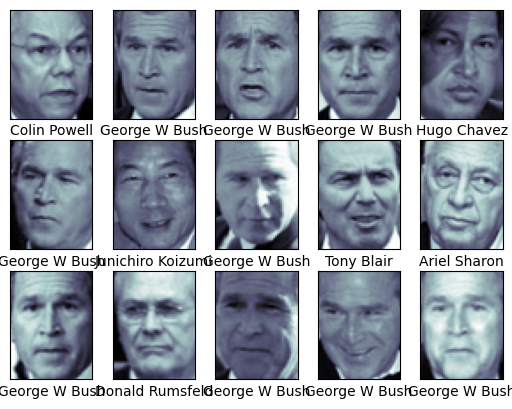

In [89]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**Langkah 2 - Pra Pengolahan Data**

Pada tahap ini, kita akan mencoba melakukan proses pra pengolahan data sederhana dengan menggunakan Principal Component Analysis (PCA). PCA akan memproyeksikan fitur dengan rosolusi tinggi (banyak dimensi) ke dalam principal component atau fitur yang dianggap penting saja. Metode PCA sering juga disebut sebagai metode reduksi dimensi.

In [90]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

**Langkah 3 - Split Data**

In [91]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

**Langkah 4 - Pembuatan Model + Tunning**

Pada langkah ini, kita akan mensimulasikan pembuatan model dan hyperparameter tunning secara langsung untuk mendapatkan nilai hyperparameter yang terbaik. Nilai tersebut dapat dicapai salah satunya dengan menggunakan teknik GridSearch. GridSearch akan mencoba menjadi kombinasi hyperparameter terbaik dengan cara melakukan pengujian performansinya satu per satu. Cara ini mudah akan tetapi memakan waktu yang lama dan komputasi yang cukup tinggi.

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 13s, sys: 260 ms, total: 2min 13s
Wall time: 1min 37s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


Sehingga didapatkan informasi bahwa, hyperparameter terbaik dari model SVM yang kita buat adalah dengan, C=5 dan Gamma=0.001 dengan tingkat akurasi 82.88%.

Gunakan model terbaik tersebut untuk proses prediksi.

In [93]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

**Langkah 5 - Cek Hasil Prediksi**

Cek hasil prediksi pada citra.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

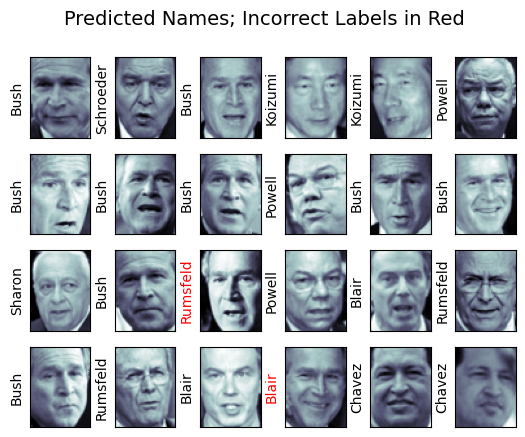

In [94]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Contoh di atas hanya menunjukkan satu data dengan label salah. Selanjutnya, kita akan mengukur performa model dengan classification report dan confusion matrix.

**Langkah 6 - Cek Performansi**

Pertama, cek performansi dengan classification_report dari sklearn.

In [95]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Dari tabel tersebut, kita mendapatkan informasi terkait dengan akurasi keseluruhan, presisi, recall, dan f1-score untuk setiap label.

Selanjutnya, kita dapat menggunakan confusion matrix untuk mengetahui label label yang terklasifikasi  dengan benar dan tidak.

Text(113.92222222222219, 0.5, 'predicted label')

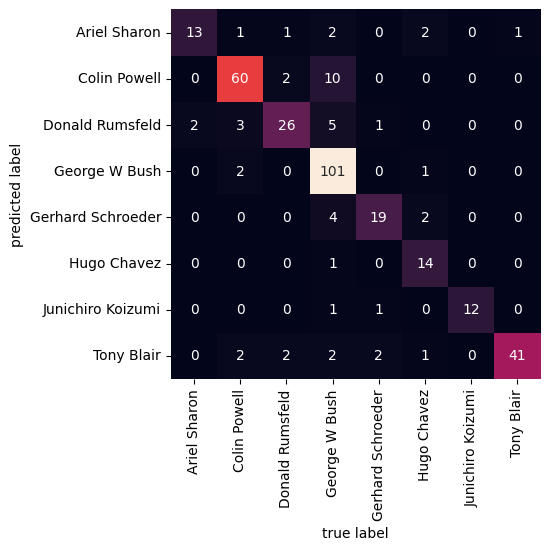

In [96]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#**PRAKTIKUM 5**
Klasifikasi Citra Siang dan Malang

**Pengantar**

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

**Langkah 0 - Import Library**

In [97]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

Lakukan ekstraksi data gambar, kemudian definisikan lokasi gambar. Pada contoh ini, folder gambar berlokasi sama dengan lokasi file python.

In [102]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Tentukan direktori gambar di Google Drive
base_dir = '/content/drive/MyDrive/MESIN LEARNING/images/images'

train_dir = os.path.join(base_dir, 'training')
test_dir = os.path.join(base_dir, 'test')

print("Isi folder training:", os.listdir(train_dir))
print("Isi folder test:", os.listdir(test_dir))

Mounted at /content/drive
Isi folder training: ['night', 'day']
Isi folder test: ['day', 'night']


**Langkah 1 - Load Data dan Visualisasikan**

Buatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [103]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Load gambar training

In [104]:
# Load training data
train_img = load_dataset(train_dir)

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [107]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[  5,   0,   4],
         [  7,   2,   6],
         [  8,   3,   7],
         ...,
         [  5,   1,   2],
         [  5,   1,   2],
         [  5,   1,   2]],
 
        [[  5,   0,   4],
         [  7,   2,   6],
         [  8,   3,   7],
         ...,
         [  4,   0,   1],
         [  4,   0,   1],
         [  4,   0,   1]],
 
        [[  6,   1,   5],
         [  7,   2,   6],
         [  7,   2,   6],
         ...,
         [  3,   0,   0],
         [  3,   0,   0],
         [  3,   0,   0]],
 
        ...,
 
        [[  7,   1,   3],
         [  7,   1,   3],
         [  7,   1,   3],
         ...,
         [180, 216, 178],
         [197, 225, 184],
         [206, 232, 187]],
 
        [[  7,   1,   3],
         [  7,   1,   3],
         [  7,   1,   3],
         ...,
         [ 97, 137, 103],
         [163, 193, 157],
         [190, 216, 179]],
 
        [[  7,   1,   3],
         [  7,   1,   3],
         [  7,   1,   3],
         ...,
         [196, 239, 211],
  

Cek ukuran gambar secara acak

In [108]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 50
(889, 1280, 3)


Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [109]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Lakukan visualisasi gambar secara acak

Shape	: (737, 1024, 3)
Label	: night


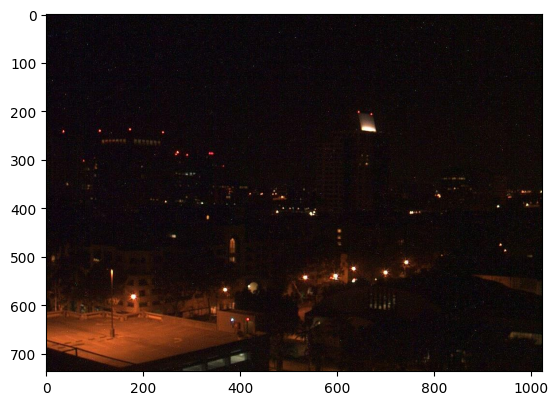

In [120]:
random_img_viz(train_img)

**Langkah 3 - Pra Pengolahan Data**

Pada tahap ini, kita akan melakukan dua proses utama, yaitu standardisasi ukuran gambar, dan encoding label gambar.

Bualah fungsi berikut untuk menstandarkan ukuran gambar.

In [121]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label.

In [122]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [123]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Lakukan pra pengolahan data pada data training.

In [124]:
train_std_img_list = preprocess(train_img)

Lakukan pengecekan ukuran gambar secara acak.

In [125]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 164
(600, 1100, 3)


WARNING! Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Hasilnya akan seperti gambar berikut,

Shape	: (600, 1100, 3)
Label	: 0


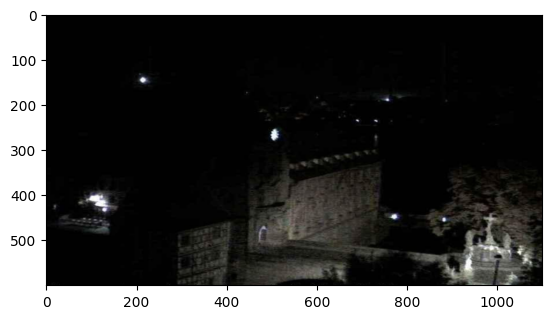

In [126]:
random_img_viz(train_std_img_list)

**Langkah 4 - Ekstraksi Fitur**

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan.

In [127]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 119
Avg Brighness: 26.9463


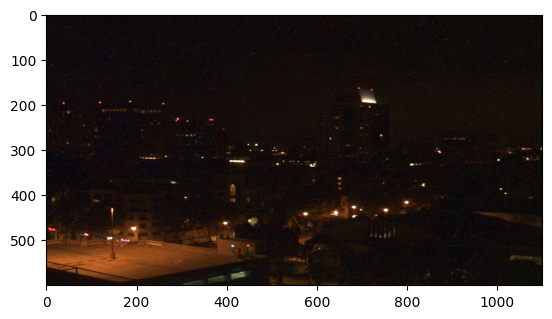

In [139]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

**Langkah 5 - Klasifikasi dengan Metode Threshold**

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [140]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Lakukan pengecekan prediksi secara acak pada data training

Image 8
Actual label: 0
Predicted label: 0


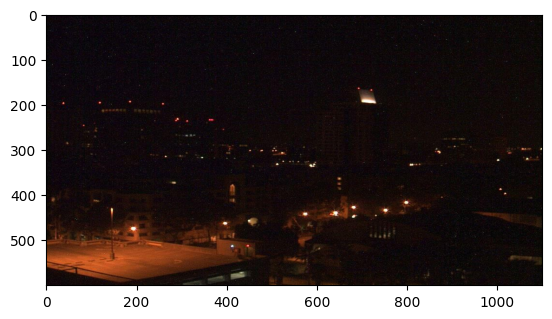

In [179]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

**Langkah 6 - Evaluasi Manual**

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [180]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Lakukan evaluasi pada data training dengan nilai ambang batas 120.

In [181]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Anda dapat mengubah nilai ambang batas dan amati hasilnya.

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [182]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


**Klasifikasi dengan SVM**

Sebelumnya, kita hanya menggunakan threshold sebagai acuan. Cara ini mungkin tidak efektif dikarenakan kita harus menentukan threshold dengan tepat. Oleh karena itu, selanjutnya kita akan mencoba menggunakan model SVM untuk proses klasifikasi. Seluruh langkah yang digunakan serupa, kita hanya mengubah mulai langkah ke-4.

**Langkah 4 Alternatif - Membuat Feature Vectors.**

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

In [183]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Cek hasilnya pada data training,

In [184]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,38.835795,0.0
1,25.646491,0.0
2,113.241642,0.0
3,22.901848,0.0
4,33.015533,0.0


Lakukan langkah yang serupa pada data testing

In [185]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,184.670024,1.0
1,140.618388,1.0
2,194.228062,1.0
3,127.443791,1.0
4,133.870114,1.0


**Langkah 5 - Buat Model SVM**

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [186]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

**Langkah 6 - Evaluasi**

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [187]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


**TUGAS PRAKTIKUM**


1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.

i. Gunakan model dengan kernel linier.

ii. Gunakan model dengan kernel polynomial.

iii. Gunakan model dengan kernel RBF.

b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

**Import Library dan Data**

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from google.colab import files

# Upload file
uploaded = files.upload()

# Ambil nama file yang diupload secara otomatis
filename = list(uploaded.keys())[0]
print("Nama file:", filename)

# Baca dataset
data = pd.read_csv(filename)

# Encode label (male/female) → numerik
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Pisahkan fitur dan target
X = data.drop('label', axis=1)
y = data['label']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Saving voice (1).csv to voice (1).csv
Nama file: voice (1).csv


**Fungsi untuk membangun model dan menghitung akurasi**

In [189]:
def evaluate_svm(X, y, test_size, kernel):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [190]:
results = []
kernels = ['linear', 'poly', 'rbf']
splits = [0.3, 0.2]

for split in splits:
    for kernel in kernels:
        acc = evaluate_svm(X_scaled, y, split, kernel)
        results.append({'Rasio Data Uji': split, 'Kernel': kernel, 'Akurasi': acc})

# Tampilkan hasil
df_results = pd.DataFrame(results)
print(df_results)

   Rasio Data Uji  Kernel   Akurasi
0             0.3  linear  0.978970
1             0.3    poly  0.958991
2             0.3     rbf  0.983176
3             0.2  linear  0.974763
4             0.2    poly  0.957413
5             0.2     rbf  0.982650


**Bagian 2 : Klasifikasi Siang vs Malam Menggunakan SVM (Kernel RBF)**

**Import Library dan Persiapan Data**

In [192]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV

# Path ke folder dataset
base_path = "/content/drive/MyDrive/MESIN LEARNING/images/images/training"
categories = ['day', 'night']

X = []
y = []

# Ekstraksi fitur histogram
for label, category in enumerate(categories):
    folder = os.path.join(base_path, category)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8],
                                [0, 256, 0, 256, 0, 256])
            hist = cv2.normalize(hist, hist).flatten()
            X.append(hist)
            y.append(label)

X = np.array(X)
y = np.array(y)

**Split Data (80-20)**

In [193]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Hyperparameter Tuning untuk Kernel RBF**

In [194]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

svm_rbf = SVC(kernel='rbf', random_state=42)

grid = GridSearchCV(svm_rbf, param_grid, refit=True, verbose=1, cv=3)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'C': 10, 'gamma': 0.1}


**Evaluasi Akurasi Model**

In [195]:
from sklearn.metrics import accuracy_score

# Prediksi data uji
y_pred = grid.predict(X_test)

# Hitung akurasi
acc = accuracy_score(y_test, y_pred)

# Cetak hasil ringkas
print("Best Parameters:", grid.best_params_)
print("Akurasi Model (RBF):", round(acc, 2))


Best Parameters: {'C': 10, 'gamma': 0.1}
Akurasi Model (RBF): 0.98
